In [2]:
import pandas as pd
import numpy as np
import wget
from tqdm import tqdm
import cv2 
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
df = pd.read_csv("Milkweed_iNaturalist.csv")
df.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,101943,Sun Jul 15 2012 14:33:04 GMT-0500 (CDT),7/15/2012,2012-07-15 19:33:04 UTC,Central Time (US & Canada),6113,montanamike,NaN,2012-07-16 01:41:15 UTC,2017-05-13 02:16:27 UTC,...,NaN,NaN,False,NaN,NaN,common milkweed,Asclepias syriaca,common milkweed,Plantae,47911
1,160843,12/11/2012,12/11/2012,NaN,Central Time (US & Canada),8882,bouteloua,cassi saari,2012-12-12 02:52:15 UTC,2018-03-11 20:16:29 UTC,...,NaN,NaN,False,NaN,NaN,common milkweed,Asclepias syriaca,common milkweed,Plantae,47911
2,311680,"June 25, 2013 10:49:00 AM CDT",6/25/2013,2013-06-25 15:49:00 UTC,Central Time (US & Canada),18260,mergirl22,NaN,2013-06-25 19:54:12 UTC,2017-05-13 02:26:32 UTC,...,NaN,NaN,False,gps,gps,common milkweed,Asclepias syriaca,common milkweed,Plantae,47911
3,375506,Wed Aug 21 2013 10:31:33 GMT-0500 (CDT),8/21/2013,2013-08-21 15:31:33 UTC,Central Time (US & Canada),19192,eplonka1,NaN,2013-08-24 15:22:46 UTC,2017-05-13 03:31:51 UTC,...,NaN,NaN,False,NaN,NaN,common milkweed,Asclepias syriaca,common milkweed,Plantae,47911
4,393770,9/5/2013 14:32,9/5/2013,2013-09-05 21:32:03 UTC,Pacific Time (US & Canada),2991,sea-kangaroo,NaN,2013-09-10 21:12:19 UTC,2023-03-05 17:34:49 UTC,...,NaN,NaN,False,NaN,manual,Broadleaf Milkweed,Asclepias syriaca,common milkweed,Plantae,47911


In [4]:
df.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'user_id', 'user_login', 'user_name', 'created_at',
       'updated_at', 'quality_grade', 'license', 'url', 'image_url',
       'sound_url', 'tag_list', 'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated',
       'oauth_application_id', 'place_guess', 'latitude', 'longitude',
       'positional_accuracy', 'private_place_guess', 'private_latitude',
       'private_longitude', 'public_positional_accuracy', 'geoprivacy',
       'taxon_geoprivacy', 'coordinates_obscured', 'positioning_method',
       'positioning_device', 'species_guess', 'scientific_name', 'common_name',
       'iconic_taxon_name', 'taxon_id'],
      dtype='object')

In [9]:
# d = dict()
# for link in tqdm(range(len(df['image_url']))):
#     try:
#         wget.download(df['image_url'][link], out='milkweed/images/'+str(link)+'.jpg')
#         d[str(link)] = df['image_url'][link]
#     except:
#         continue

100%|██████████| 4210/4210 [17:42<00:00,  3.96it/s]


In [348]:
img = cv2.imread("milkweed/images/0.jpg")
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# img = cv2.filter2D(img, -1, kernel)
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

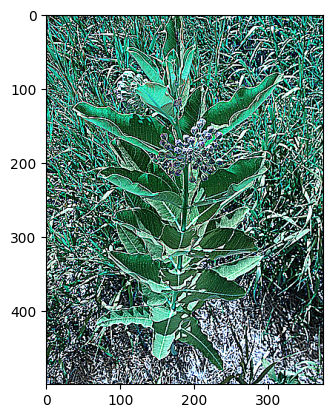

In [355]:
plt.imshow(img)
plt.show()

In [349]:
# blur = cv2.blur(img,(5,5))
# blur0=cv2.medianBlur(blur,5)
#blur1= cv2.GaussianBlur(blur0,(5,5),0)
#blur2= cv2.bilateralFilter(blur1,9,75,75)

In [350]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [351]:
low_green = np.array([30, 0, 0])
high_green = np.array([95, 255, 255])
mask = cv2.inRange(hsv, low_green, high_green)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.erode(mask, kernel) 
mask = cv2.erode(mask, kernel) 
mask = cv2.dilate(mask, kernel) 


In [352]:
res = cv2.bitwise_and(img,img, mask= mask)

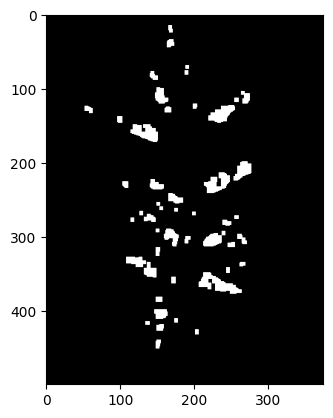

In [353]:
plt.imshow(255-mask, cmap='Greys')
plt.show()

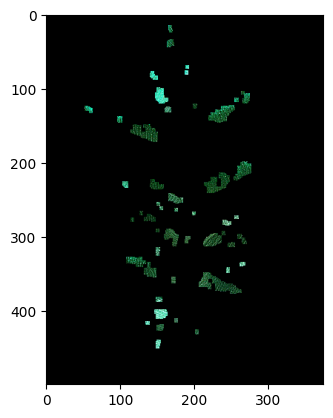

In [354]:
plt.imshow(res)
plt.show()

In [344]:
nb_blobs, im_with_separated_blobs, stats, _ = cv2.connectedComponentsWithStats(mask)
sizes = stats[:, -1]
sizes = sizes[1:]
nb_blobs -= 1

min_size = 20500  

im_result = np.zeros_like(im_with_separated_blobs)
# for every component in the image, keep it only if it's above min_size
for blob in range(nb_blobs):
    if sizes[blob] >= min_size:
        # see description of im_with_separated_blobs above
        im_result[im_with_separated_blobs == blob + 1] = 255

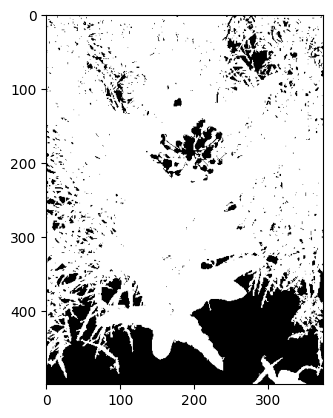

In [345]:
plt.imshow(255-im_result, cmap='Greys')
plt.show()

In [346]:
res = cv2.bitwise_and(img,img, mask= np.array(im_result).astype(np.uint8))

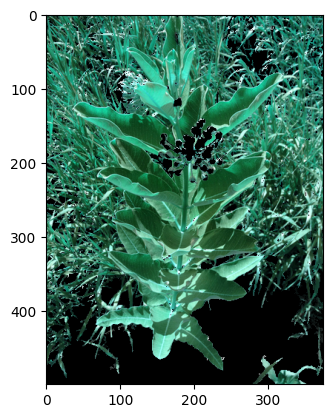

In [347]:
plt.imshow(res)
plt.show()

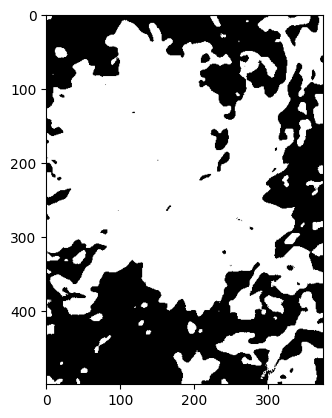

In [41]:
plt.imshow(255-mask, cmap='Greys')
plt.show()

(-0.5, 373.5, 499.5, -0.5)

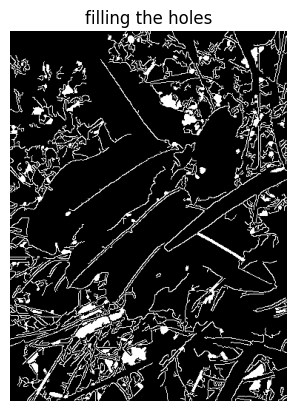

In [76]:
from scipy import ndimage as ndi

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=400) 

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots()
ax.imshow(fill_coins, cmap=plt.cm.gray)
ax.set_title('filling the holes')
ax.axis('off')

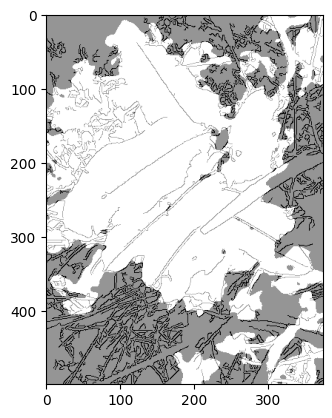

In [81]:

plt.imshow(255-im_result+edges, cmap='Greys')
plt.show()

In [88]:
mask2 = np.zeros_like(img)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:
        cv2.fillPoly(mask2, [contour], 255)

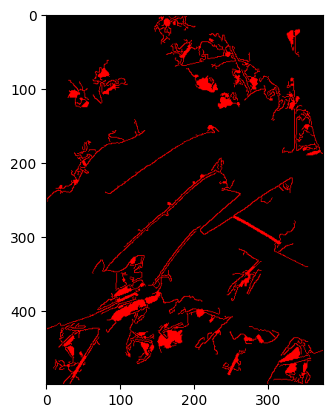

In [89]:
plt.imshow(mask2, cmap='Greys')
plt.show()

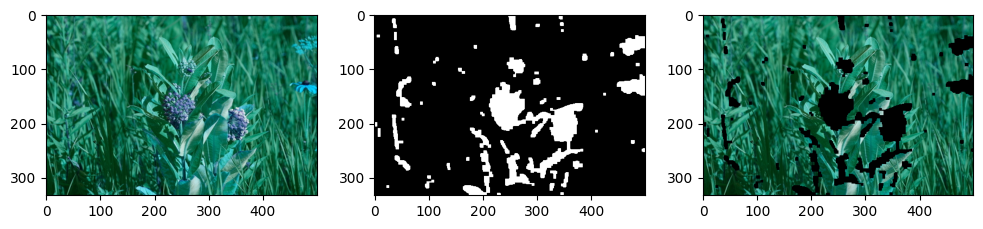

In [362]:
img = cv2.imread("milkweed/images/4198.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

low_green = np.array([30, 0, 0])
high_green = np.array([95, 255, 255])

mask = cv2.inRange(hsv, low_green, high_green)

kernel = np.ones((5, 5), np.uint8)
mask = cv2.erode(mask, kernel) 
mask = cv2.erode(mask, kernel) 
mask = cv2.dilate(mask, kernel) 

res = cv2.bitwise_and(img,img, mask= mask)

nb_blobs, im_with_separated_blobs, stats, _ = cv2.connectedComponentsWithStats(mask)
sizes = stats[:, -1]
sizes = sizes[1:]
nb_blobs -= 1

min_size = 20500  

im_result = np.zeros_like(im_with_separated_blobs)
for blob in range(nb_blobs):
    if sizes[blob] >= min_size:
        im_result[im_with_separated_blobs == blob + 1] = 255

res = cv2.bitwise_and(img,img, mask= np.array(im_result).astype(np.uint8))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,10))
fig.tight_layout()
ax1.imshow(img)
ax2.imshow(mask, cmap="Greys")
ax3.imshow(res)